In [1]:
# Import necessary packages
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt

import torch 
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms

%matplotlib inline

In [2]:
# Device configuration
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

# Hyper parameters
num_epochs = 5
num_classes = 10
batch_size = 100
learning_rate = 0.001

# MNIST dataset
train_dataset = torchvision.datasets.MNIST(root='../../data', train=True, transform=transforms.ToTensor(), download=True)

test_dataset = torchvision.datasets.MNIST(root='../../data', train=False, transform=transforms.ToTensor())

# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

In [4]:
class CNN(nn.Module):
    def __init__(self, num_classes=10):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.mp = nn.MaxPool2d(kernel_size=2)
        self.fc = nn.Linear(320, num_classes)
        
    def forward(self, x):
        in_size = x.size(0)
        x = torch.relu(self.mp(self.conv1(x)))
        x = torch.relu(self.mp(self.conv2(x)))
        x = x.view(in_size, -1)
        x = self.fc(x)
        return x

In [86]:
def conv_out(W, K, S, P):
    return (W - K + 2 * P) / (S) + 1

def poll_out(W, K, S):
    return np.floor((W - K) / (S)) + 1

In [89]:
out = conv_out(28, 5, 1, 0)
out

24.0

In [90]:
out = poll_out(out, 2, 2)
out 

12.0

In [91]:
out = conv_out(out, 5, 1, 0)
out

8.0

In [92]:
out = poll_out(out, 2, 2)
out

4.0

In [5]:
model = CNN()

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Train the model
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

Epoch [1/5], Step [100/600], Loss: 0.3183
Epoch [1/5], Step [200/600], Loss: 0.3041
Epoch [1/5], Step [300/600], Loss: 0.2136
Epoch [1/5], Step [400/600], Loss: 0.1373
Epoch [1/5], Step [500/600], Loss: 0.0730
Epoch [1/5], Step [600/600], Loss: 0.0614
Epoch [2/5], Step [100/600], Loss: 0.0974
Epoch [2/5], Step [200/600], Loss: 0.1669
Epoch [2/5], Step [300/600], Loss: 0.1081
Epoch [2/5], Step [400/600], Loss: 0.0627
Epoch [2/5], Step [500/600], Loss: 0.0830
Epoch [2/5], Step [600/600], Loss: 0.0976
Epoch [3/5], Step [100/600], Loss: 0.0747
Epoch [3/5], Step [200/600], Loss: 0.0864
Epoch [3/5], Step [300/600], Loss: 0.0982
Epoch [3/5], Step [400/600], Loss: 0.0863
Epoch [3/5], Step [500/600], Loss: 0.0602
Epoch [3/5], Step [600/600], Loss: 0.0161
Epoch [4/5], Step [100/600], Loss: 0.0538
Epoch [4/5], Step [200/600], Loss: 0.1317
Epoch [4/5], Step [300/600], Loss: 0.0300
Epoch [4/5], Step [400/600], Loss: 0.0905
Epoch [4/5], Step [500/600], Loss: 0.0180
Epoch [4/5], Step [600/600], Loss:

In [69]:
# Test the model
# model.eval()  # eval mode (batchnorm uses moving mean/variance instead of mini-batch mean/variance)
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Test Accuracy of the model on the 10000 test images: {} %'.format(100 * correct / total))

Test Accuracy of the model on the 10000 test images: 98.43 %


In [102]:
def train(model, dataloader, criterion, optimizer):
    model.train()
    total_loss = 0
    total_acc = 0
    n_batches = len(dataloader)
    for inputs, targets in dataloader:
        ## Forward Pass
        output = model(inputs)
        ## Clear Gradients
        model.zero_grad()
        loss = criterion(output, targets)
        ## Backprop
        loss.backward()
        optimizer.step()
        ## prediction and accuracy
        outputs = model(images)
        accuracy = get_accuracy(outputs, targets) 
        total_loss += loss.item()
        total_acc += accuracy
    mean_loss = total_loss / n_batches
    mean_acc = total_acc / n_batches
    return mean_loss, mean_acc

def get_accuracy(preds, targets):
    _, predicted = torch.max(preds.data, 1)
    total = targets.size(0)
    correct = (predicted == labels).sum()           
    return (100 * correct / total)

# Train the model
total_step = len(train_loader)
for epoch in range(num_epochs):
    mn_loss, mn_acc =  train(model, train_loader, criterion, optimizer) 
    print ('Epoch: {}, Acc: {:.4f}, Loss: {:.4f}'.format(epoch+1, mn_acc, mn_loss))

Epoch: 1, Acc: 99.0000, Loss: 0.0347
Epoch: 2, Acc: 99.0000, Loss: 0.0312
Epoch: 3, Acc: 99.0000, Loss: 0.0292
Epoch: 4, Acc: 99.0000, Loss: 0.0273
Epoch: 5, Acc: 99.0000, Loss: 0.0255


In [106]:
model

CNN(
  (conv1): Conv2d(1, 10, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(10, 20, kernel_size=(5, 5), stride=(1, 1))
  (mp): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc): Linear(in_features=320, out_features=10, bias=True)
)

<Figure size 432x288 with 0 Axes>

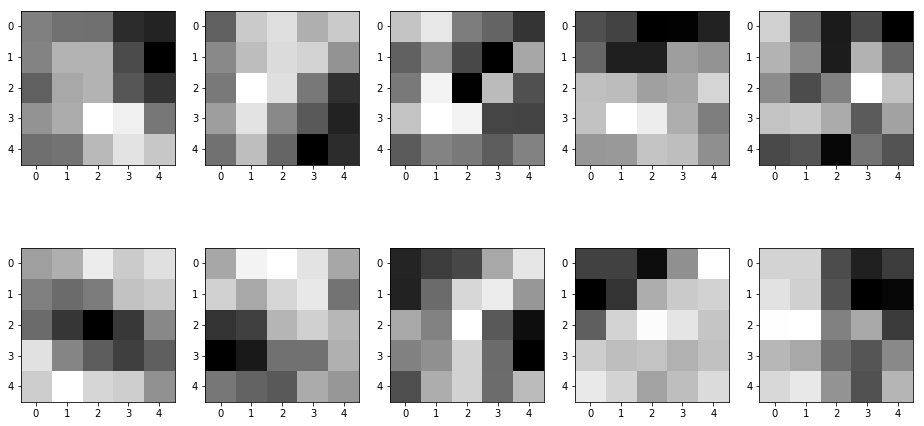

In [142]:
fig = plt.figure()
plt.figure(figsize=(16,8))
idx = 1
for w  in model.conv1.weight:
    data = w.data[0]
    plt.subplot(2, 5, idx)
    plt.imshow(data, cmap="gray")
    idx += 1
    
fig.show()

<Figure size 432x288 with 0 Axes>

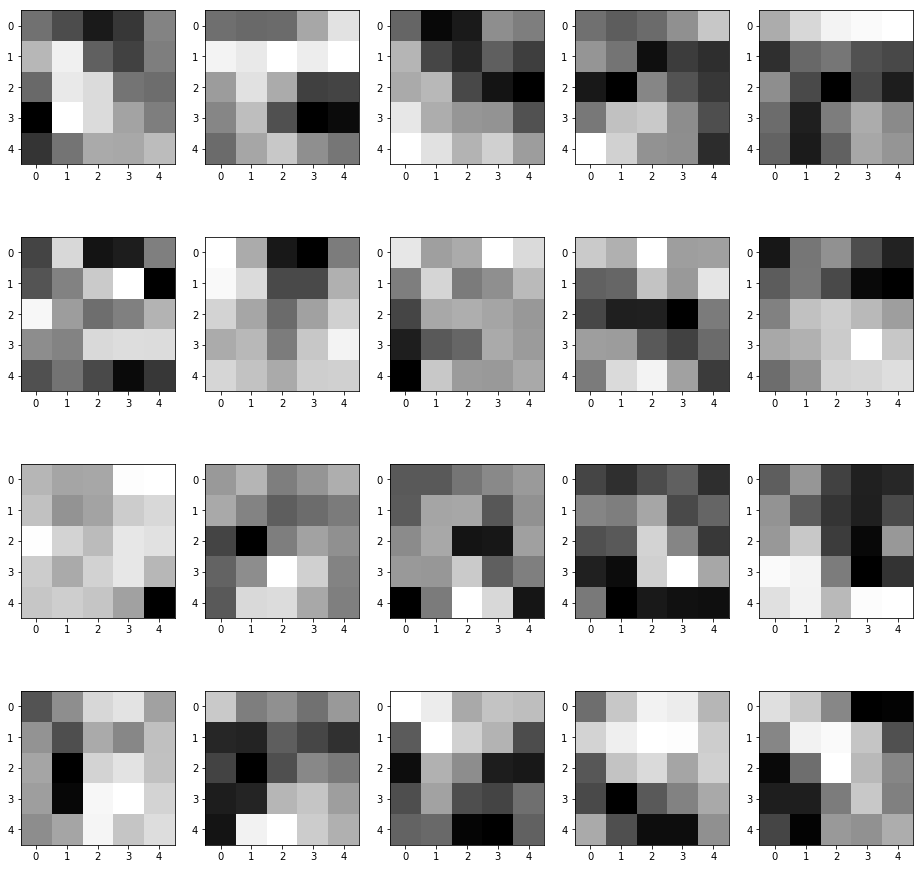

In [141]:
fig = plt.figure()
plt.figure(figsize=(16,16))
idx = 1
for w  in model.conv2.weight:
    data = w.data[0]
    plt.subplot(4, 5, idx)
    plt.imshow(data, cmap="gray")
    idx += 1
    
fig.show()